In [1]:
epochs = 100

In [2]:
%matplotlib inline
import os, sys

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import f1_score, classification_report, confusion_matrix, make_scorer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

import keras
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Input, Dense
from keras.models import Model
from keras.optimizers import SGD
from keras import regularizers
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
from keras import backend as K
import tensorflow as tf

Using TensorFlow backend.
/home/admin/miniconda3/envs/da03/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/admin/miniconda3/envs/da03/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/admin/miniconda3/envs/da03/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/admin/miniconda3/env

In [3]:
sys.path.append('/home/admin/github/wordroid.sblo.jp/lib')
#from gkernel import GaussianKernel, GaussianKernel2, GaussianKernel3
from keras_ex.gkernel import GaussianKernel, GaussianKernel2, GaussianKernel3
from keras_ex.gkernel.sklearn import (
    RBFRegressor, RBFClassifier,
    make_model_gkernel1,
    make_model_gkernel2,
    make_model_gkernel3,
    make_model_out,
    make_model
)

In [4]:
# from sklearn.datasets import load_digits
# digits = load_digits()
# X, y = digits.data, digits.target
# X = X / 16
# X.shape, X.min(), X.max()

In [5]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
mnist

/home/admin/miniconda3/envs/da03/lib/python3.6/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)
/home/admin/miniconda3/envs/da03/lib/python3.6/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)


{'DESCR': 'mldata.org dataset: mnist-original',
 'COL_NAMES': ['label', 'data'],
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

In [6]:
X, y = mnist.data, mnist.target
X = X / 255
X.shape, X.min(), X.max()

((70000, 784), 0.0, 1.0)

In [7]:
y.shape

(70000,)

In [8]:
y_cat = to_categorical(y, num_classes=10)
y_cat.shape

(70000, 10)

In [9]:
(
    x_train, x_test,
    y_cat_train, y_cat_test,
    y_train, y_test
) = train_test_split(X, y_cat, y,
                     test_size=0.4,
                     stratify=y, random_state=10002)

(
    x_train.shape, x_test.shape,
    y_cat_train.shape, y_cat_test.shape,
    y_train.shape, y_test.shape
)

((42000, 784), (28000, 784), (42000, 10), (28000, 10), (42000,), (28000,))

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV, validation_curve
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression, Lasso
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, roc_auc_score, r2_score, make_scorer
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
import joblib

from lightgbm import LGBMClassifier

In [11]:
import warnings
warnings.filterwarnings('ignore')

In [12]:
def f1_scorer(estimator, X, y):
    pred = estimator.predict(X)
    s = f1_score(y, pred, average='macro')
    return s

## batch_size=32
taking long time
* use make_model_gkernel2

In [13]:
clf1 = RBFClassifier(
    num_lm=150,
    lm_select_from_x=True,
    random_state=10001,
    #make_model_gkernel=make_model_gkernel3,
    #tol=float(np.sqrt(np.finfo(np.float32).eps)/2),
    lr=0.05, gamma='scale',
    epochs=epochs, batch_size=32, verbose=0,
    session_clear=False
)

In [14]:
%%time
#hst = clf1.fit(x_train, y_cat_train)
hst = clf1.fit(x_train, y_train)







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
CPU times: user 7min 33s, sys: 15 s, total: 7min 48s
Wall time: 5min 24s


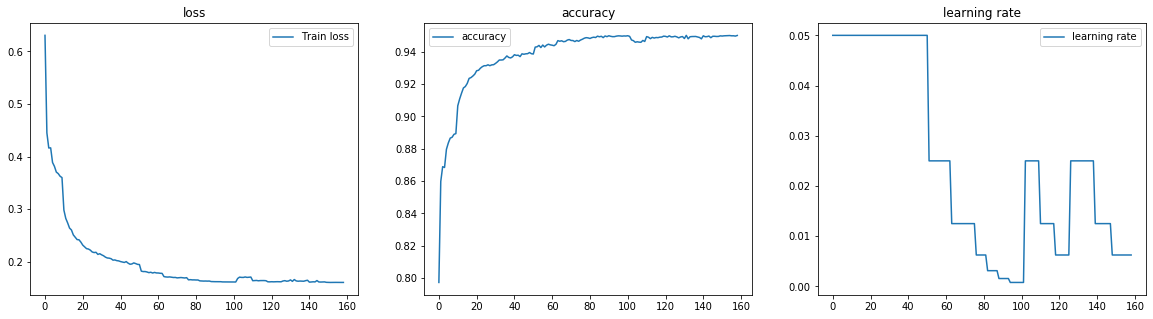

In [15]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))
ax[0].set_title('loss')
ax[0].plot(list(range(len(hst["loss"]))), hst["loss"], label="Train loss")
ax[1].set_title('accuracy')
ax[1].plot(list(range(len(hst["loss"]))), hst["acc"], label="accuracy")
ax[2].set_title('learning rate')
ax[2].plot(list(range(len(hst["loss"]))), hst["lr"], label="learning rate")
ax[0].legend()
ax[1].legend()
ax[2].legend()

In [16]:
pred = clf1.predict(x_train)
pred.shape

(42000,)

In [17]:
pred

array([2., 9., 9., ..., 8., 4., 1.])

In [18]:
print('F1_SCORE :', f1_score(y_train, pred, average='macro'))
print(classification_report(y_train, pred))
print(confusion_matrix(y_train, pred))

F1_SCORE : 0.9494031069400434
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98      4142
         1.0       0.98      0.98      0.98      4726
         2.0       0.94      0.95      0.94      4194
         3.0       0.93      0.93      0.93      4285
         4.0       0.95      0.95      0.95      4094
         5.0       0.93      0.93      0.93      3788
         6.0       0.96      0.97      0.97      4125
         7.0       0.95      0.96      0.96      4376
         8.0       0.93      0.93      0.93      4095
         9.0       0.93      0.93      0.93      4175

    accuracy                           0.95     42000
   macro avg       0.95      0.95      0.95     42000
weighted avg       0.95      0.95      0.95     42000

[[4064    0   11    0    6   17   18    6   13    7]
 [   1 4628   22   11    6    4    9   10   28    7]
 [  19   15 3966   36   43    8   24   37   39    7]
 [   3    9   81 3967    3   88    6   30   65   33]

In [19]:
pred_test = clf1.predict(x_test)
pred_test.shape

(28000,)

In [20]:
print('F1_SCORE :', f1_score(y_test, pred_test, average='macro'))
print(classification_report(y_test, pred_test))
print(confusion_matrix(y_test, pred_test))

F1_SCORE : 0.9446020120905017
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.97      2761
         1.0       0.98      0.98      0.98      3151
         2.0       0.94      0.94      0.94      2796
         3.0       0.93      0.92      0.93      2856
         4.0       0.94      0.94      0.94      2730
         5.0       0.92      0.93      0.93      2525
         6.0       0.96      0.96      0.96      2751
         7.0       0.95      0.95      0.95      2917
         8.0       0.93      0.92      0.92      2730
         9.0       0.93      0.92      0.92      2783

    accuracy                           0.95     28000
   macro avg       0.94      0.94      0.94     28000
weighted avg       0.95      0.95      0.95     28000

[[2692    1   13    1    1   22   11    3   10    7]
 [   1 3092    5   10    1    5    6    5   18    8]
 [  13   13 2637   24   27    4   14   14   48    2]
 [   3    4   46 2630    1   78    4   25   40   25]

## batch_size=500
* use make_model_gkernel2

In [21]:
clf1 = RBFClassifier(
    num_lm=150,
    lm_select_from_x=True,
    random_state=10001,
    #make_model_gkernel=make_model_gkernel3,
    #tol=float(np.sqrt(np.finfo(np.float32).eps)/4),
    #tol=float(np.finfo(np.float32).eps),
    lr=0.05, gamma='scale',
    epochs=epochs, batch_size=500, verbose=0,
    session_clear=False
)

In [22]:
np.sqrt(np.finfo(np.float32).eps), np.sqrt(np.finfo(np.float32).eps)/2, np.sqrt(np.finfo(np.float32).eps)/4

(0.00034526698, 0.0001726334885461256, 8.63167442730628e-05)

In [23]:
%%time
#hst = clf1.fit(x_train, y_cat_train)
hst = clf1.fit(x_train, y_train)

CPU times: user 1min 52s, sys: 2.16 s, total: 1min 54s
Wall time: 1min 4s


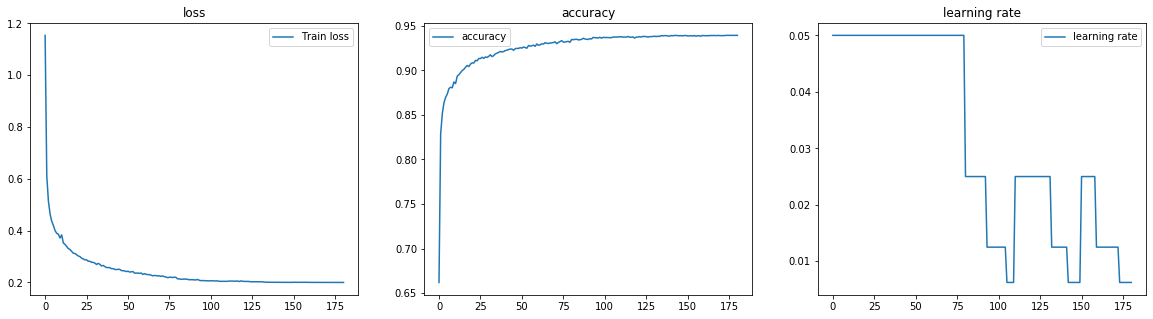

In [24]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))
ax[0].set_title('loss')
ax[0].plot(list(range(len(hst["loss"]))), hst["loss"], label="Train loss")
ax[1].set_title('accuracy')
ax[1].plot(list(range(len(hst["loss"]))), hst["acc"], label="accuracy")
ax[2].set_title('learning rate')
ax[2].plot(list(range(len(hst["loss"]))), hst["lr"], label="learning rate")
ax[0].legend()
ax[1].legend()
ax[2].legend()

In [25]:
pred = clf1.predict(x_train)
pred.shape

(42000,)

In [26]:
pred

array([2., 9., 9., ..., 8., 4., 1.])

In [27]:
print('F1_SCORE :', f1_score(y_train, pred, average='macro'))
print(classification_report(y_train, pred))
print(confusion_matrix(y_train, pred))

F1_SCORE : 0.9387280292440066
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.97      4142
         1.0       0.97      0.98      0.97      4726
         2.0       0.93      0.93      0.93      4194
         3.0       0.93      0.91      0.92      4285
         4.0       0.93      0.94      0.93      4094
         5.0       0.92      0.92      0.92      3788
         6.0       0.96      0.96      0.96      4125
         7.0       0.94      0.95      0.94      4376
         8.0       0.92      0.91      0.92      4095
         9.0       0.92      0.91      0.91      4175

    accuracy                           0.94     42000
   macro avg       0.94      0.94      0.94     42000
weighted avg       0.94      0.94      0.94     42000

[[4042    0   11    3    9   27   22    8   15    5]
 [   1 4610   22   13    8   10    6   14   36    6]
 [  18   18 3906   43   50   16   23   53   57   10]
 [   6   13   85 3920    5  111    7   37   68   33]

In [28]:
pred_test = clf1.predict(x_test)
pred_test.shape

(28000,)

In [29]:
print('F1_SCORE :', f1_score(y_test, pred_test, average='macro'))
print(classification_report(y_test, pred_test))
print(confusion_matrix(y_test, pred_test))

F1_SCORE : 0.9354465542541494
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      2761
         1.0       0.97      0.98      0.97      3151
         2.0       0.93      0.92      0.93      2796
         3.0       0.92      0.91      0.92      2856
         4.0       0.92      0.94      0.93      2730
         5.0       0.91      0.92      0.91      2525
         6.0       0.95      0.96      0.96      2751
         7.0       0.95      0.94      0.94      2917
         8.0       0.92      0.91      0.91      2730
         9.0       0.91      0.91      0.91      2783

    accuracy                           0.94     28000
   macro avg       0.94      0.94      0.94     28000
weighted avg       0.94      0.94      0.94     28000

[[2694    0    8    2    0   19   18    2   13    5]
 [   1 3078    9   13    1   11    4    5   19   10]
 [  16   15 2578   28   45    7   20   22   59    6]
 [   2    3   50 2602    1   91    7   29   47   24]

## clf1

In [30]:
clf1 = RBFClassifier(
    num_lm=250,
    lm_select_from_x=True,
    random_state=10001,
    #make_model_gkernel=make_model_gkernel3,
    #tol=float(np.sqrt(np.finfo(np.float32).eps)/2),
    lr=0.05, gamma='scale',
    epochs=epochs, batch_size=500, verbose=0,
    session_clear=False
)
# clf1 = LGBMClassifier(min_child_samples=50, reg_alpha=0.1)

In [31]:
%%time
#hst = clf1.fit(x_train, y_cat_train)
hst = clf1.fit(x_train, y_train)

CPU times: user 2min 38s, sys: 2.23 s, total: 2min 41s
Wall time: 1min 25s


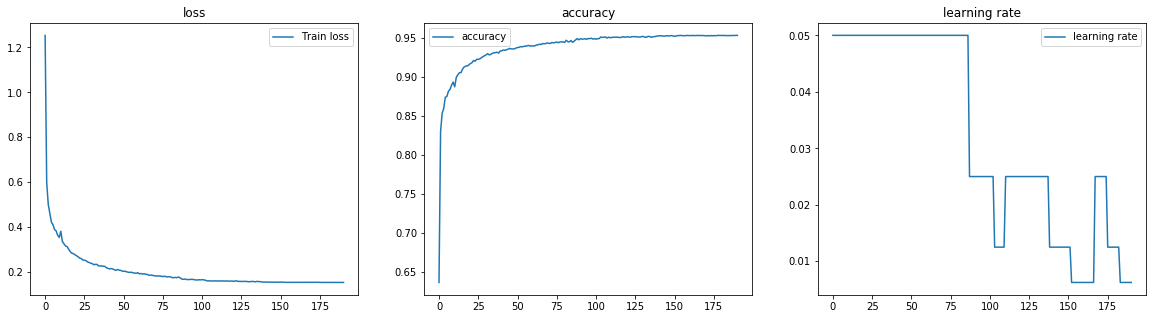

In [32]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))
ax[0].set_title('loss')
ax[0].plot(list(range(len(hst["loss"]))), hst["loss"], label="Train loss")
ax[1].set_title('accuracy')
ax[1].plot(list(range(len(hst["loss"]))), hst["acc"], label="accuracy")
ax[2].set_title('learning rate')
ax[2].plot(list(range(len(hst["loss"]))), hst["lr"], label="learning rate")
ax[0].legend()
ax[1].legend()
ax[2].legend()

In [33]:
pred = clf1.predict(x_train)
pred.shape

(42000,)

In [34]:
pred

array([2., 9., 9., ..., 8., 4., 1.])

In [35]:
print('F1_SCORE :', f1_score(y_train, pred, average='macro'))
print(classification_report(y_train, pred))
print(confusion_matrix(y_train, pred))

F1_SCORE : 0.9520643476472929
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      4142
         1.0       0.98      0.98      0.98      4726
         2.0       0.95      0.95      0.95      4194
         3.0       0.94      0.94      0.94      4285
         4.0       0.95      0.95      0.95      4094
         5.0       0.93      0.94      0.94      3788
         6.0       0.97      0.97      0.97      4125
         7.0       0.95      0.95      0.95      4376
         8.0       0.94      0.93      0.94      4095
         9.0       0.93      0.93      0.93      4175

    accuracy                           0.95     42000
   macro avg       0.95      0.95      0.95     42000
weighted avg       0.95      0.95      0.95     42000

[[4066    0   11    1    5   18   15    7   14    5]
 [   1 4631   22   11    9    9    5   13   21    4]
 [  16   14 3976   34   34   15   18   40   39    8]
 [   2   13   63 4007    3   86    3   26   54   28]

In [36]:
pred_test = clf1.predict(x_test)
pred_test.shape

(28000,)

In [37]:
print('F1_SCORE :', f1_score(y_test, pred_test, average='macro'))
print(classification_report(y_test, pred_test))
print(confusion_matrix(y_test, pred_test))

F1_SCORE : 0.9482801001707264
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98      2761
         1.0       0.98      0.98      0.98      3151
         2.0       0.95      0.95      0.95      2796
         3.0       0.94      0.93      0.93      2856
         4.0       0.94      0.95      0.94      2730
         5.0       0.93      0.94      0.93      2525
         6.0       0.97      0.97      0.97      2751
         7.0       0.96      0.95      0.95      2917
         8.0       0.93      0.92      0.93      2730
         9.0       0.93      0.93      0.93      2783

    accuracy                           0.95     28000
   macro avg       0.95      0.95      0.95     28000
weighted avg       0.95      0.95      0.95     28000

[[2699    0    8    1    1   20   15    2   13    2]
 [   1 3094    6   13    3    5    5    5   11    8]
 [  10   10 2649   25   22    4   10   15   46    5]
 [   1    4   37 2651    0   77    5   20   38   23]

## clf2

In [38]:
clf2 = RBFClassifier(
    num_lm=250,
    lm_select_from_x=True,
    random_state=10002,
    #make_model_gkernel=make_model_gkernel3,
    #tol=float(np.sqrt(np.finfo(np.float32).eps)/2),
    lr=0.05, gamma='scale',
    epochs=epochs, batch_size=500, verbose=0,
    session_clear=False
)
# clf2 = LGBMClassifier(min_child_samples=50, reg_alpha=0.1)

In [39]:
%%time
#hst = clf2.fit(x_train, y_cat_train)
hst = clf2.fit(x_train, y_train)

CPU times: user 2min 29s, sys: 2.22 s, total: 2min 31s
Wall time: 1min 20s


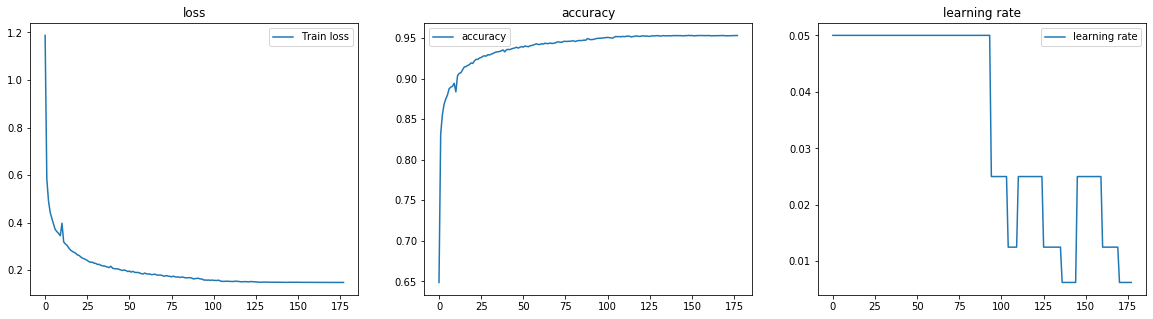

In [40]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))
ax[0].set_title('loss')
ax[0].plot(list(range(len(hst["loss"]))), hst["loss"], label="Train loss")
ax[1].set_title('accuracy')
ax[1].plot(list(range(len(hst["loss"]))), hst["acc"], label="accuracy")
ax[2].set_title('learning rate')
ax[2].plot(list(range(len(hst["loss"]))), hst["lr"], label="learning rate")
ax[0].legend()
ax[1].legend()
ax[2].legend()

In [41]:
pred = clf2.predict(x_train)
pred.shape

(42000,)

In [42]:
pred

array([2., 9., 9., ..., 8., 4., 1.])

In [43]:
print('F1_SCORE :', f1_score(y_train, pred, average='macro'))
print(classification_report(y_train, pred))
print(confusion_matrix(y_train, pred))

F1_SCORE : 0.9522815887854555
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      4142
         1.0       0.98      0.98      0.98      4726
         2.0       0.95      0.95      0.95      4194
         3.0       0.94      0.93      0.94      4285
         4.0       0.95      0.95      0.95      4094
         5.0       0.94      0.94      0.94      3788
         6.0       0.97      0.98      0.97      4125
         7.0       0.95      0.95      0.95      4376
         8.0       0.94      0.93      0.94      4095
         9.0       0.94      0.92      0.93      4175

    accuracy                           0.95     42000
   macro avg       0.95      0.95      0.95     42000
weighted avg       0.95      0.95      0.95     42000

[[4061    0   14    2    8   15   16    7   15    4]
 [   0 4632   22   15    8    3    4   13   24    5]
 [  15   15 3971   31   32    8   23   47   44    8]
 [   5   13   56 3994    2   96    1   29   64   25]

In [44]:
pred_test = clf2.predict(x_test)
pred_test.shape

(28000,)

In [45]:
print('F1_SCORE :', f1_score(y_test, pred_test, average='macro'))
print(classification_report(y_test, pred_test))
print(confusion_matrix(y_test, pred_test))

F1_SCORE : 0.9495669827222082
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      2761
         1.0       0.98      0.98      0.98      3151
         2.0       0.94      0.94      0.94      2796
         3.0       0.94      0.93      0.93      2856
         4.0       0.94      0.95      0.94      2730
         5.0       0.94      0.94      0.94      2525
         6.0       0.96      0.97      0.97      2751
         7.0       0.95      0.95      0.95      2917
         8.0       0.93      0.93      0.93      2730
         9.0       0.93      0.92      0.93      2783

    accuracy                           0.95     28000
   macro avg       0.95      0.95      0.95     28000
weighted avg       0.95      0.95      0.95     28000

[[2709    1    9    1    1   10   13    2   10    5]
 [   1 3096   10   12    1    3    3    4   15    6]
 [   8    9 2632   24   32    5   20   17   47    2]
 [   5    4   30 2656    1   76    4   21   39   20]

## clf3

In [46]:
clf3 = RBFClassifier(
    num_lm=250,
    lm_select_from_x=True,
    random_state=10003,
    #make_model_gkernel=make_model_gkernel3,
    #tol=float(np.sqrt(np.finfo(np.float32).eps)/2),
    lr=0.05, gamma='scale',
    epochs=epochs, batch_size=500, verbose=0,
    session_clear=False
)
# clf3 = LGBMClassifier(min_child_samples=50, reg_alpha=0.1)

In [47]:
%%time
#hst = clf3.fit(x_train, y_cat_train)
hst = clf3.fit(x_train, y_train)

CPU times: user 2min 24s, sys: 2.04 s, total: 2min 26s
Wall time: 1min 19s


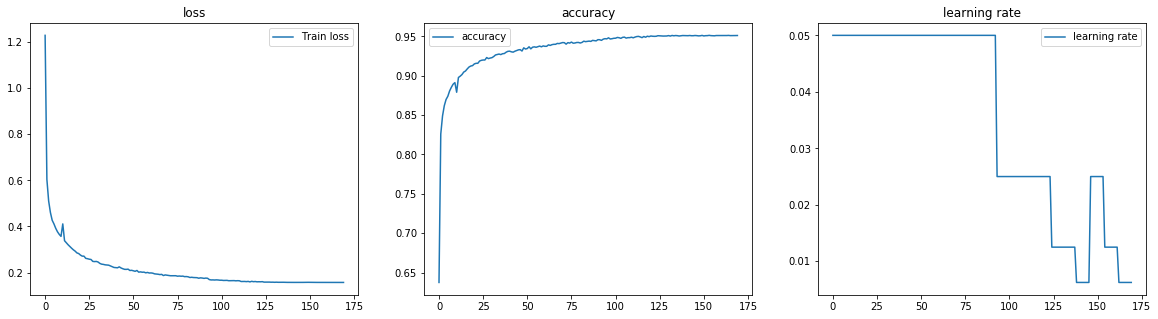

In [48]:
fig, ax = plt.subplots(1, 3, figsize=(20,5))
ax[0].set_title('loss')
ax[0].plot(list(range(len(hst["loss"]))), hst["loss"], label="Train loss")
ax[1].set_title('accuracy')
ax[1].plot(list(range(len(hst["loss"]))), hst["acc"], label="accuracy")
ax[2].set_title('learning rate')
ax[2].plot(list(range(len(hst["loss"]))), hst["lr"], label="learning rate")
ax[0].legend()
ax[1].legend()
ax[2].legend()

In [49]:
pred = clf3.predict(x_train)
pred.shape

(42000,)

In [50]:
pred

array([2., 9., 9., ..., 8., 4., 1.])

In [51]:
print('F1_SCORE :', f1_score(y_train, pred, average='macro'))
print(classification_report(y_train, pred))
print(confusion_matrix(y_train, pred))

F1_SCORE : 0.9506381862895352
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      4142
         1.0       0.97      0.98      0.98      4726
         2.0       0.94      0.94      0.94      4194
         3.0       0.94      0.93      0.93      4285
         4.0       0.95      0.96      0.95      4094
         5.0       0.93      0.94      0.93      3788
         6.0       0.97      0.97      0.97      4125
         7.0       0.95      0.95      0.95      4376
         8.0       0.94      0.93      0.94      4095
         9.0       0.93      0.92      0.93      4175

    accuracy                           0.95     42000
   macro avg       0.95      0.95      0.95     42000
weighted avg       0.95      0.95      0.95     42000

[[4067    0    9    5    3   17   14    6   12    9]
 [   0 4628   25    9    7   12    4   15   20    6]
 [  14   14 3963   31   43   11   21   43   48    6]
 [   6   17   76 3965    3   92    4   25   73   24]

In [52]:
pred_test = clf3.predict(x_test)
pred_test.shape

(28000,)

In [53]:
print('F1_SCORE :', f1_score(y_test, pred_test, average='macro'))
print(classification_report(y_test, pred_test))
print(confusion_matrix(y_test, pred_test))

F1_SCORE : 0.9464415460373636
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98      2761
         1.0       0.98      0.98      0.98      3151
         2.0       0.93      0.94      0.94      2796
         3.0       0.94      0.92      0.93      2856
         4.0       0.94      0.95      0.95      2730
         5.0       0.93      0.93      0.93      2525
         6.0       0.96      0.97      0.97      2751
         7.0       0.95      0.94      0.95      2917
         8.0       0.93      0.92      0.93      2730
         9.0       0.92      0.92      0.92      2783

    accuracy                           0.95     28000
   macro avg       0.95      0.95      0.95     28000
weighted avg       0.95      0.95      0.95     28000

[[2705    0    8    3    1   17   12    0   10    5]
 [   1 3086   13   11    3    8    3    7   12    7]
 [   7   10 2637   24   26    4   23   14   48    3]
 [   6    5   48 2635    0   66    4   20   51   21]

In [54]:
clfs = [clf1, clf2, clf3]

In [55]:
pred_proba = [clf.predict_proba(x_train) for clf in clfs]

In [56]:
np.stack(pred_proba).mean(axis=0).shape

(42000, 10)

In [57]:
print('F1_SCORE :', f1_score(y_train, np.argmax(np.stack(pred_proba).mean(axis=0), axis=1), average='macro'))
print(classification_report(y_train, np.argmax(np.stack(pred_proba).mean(axis=0), axis=1)))
print(confusion_matrix(y_train, np.argmax(np.stack(pred_proba).mean(axis=0), axis=1)))

F1_SCORE : 0.956677338563369
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      4142
         1.0       0.98      0.98      0.98      4726
         2.0       0.95      0.95      0.95      4194
         3.0       0.95      0.94      0.94      4285
         4.0       0.95      0.96      0.96      4094
         5.0       0.94      0.95      0.94      3788
         6.0       0.97      0.98      0.97      4125
         7.0       0.96      0.96      0.96      4376
         8.0       0.95      0.94      0.94      4095
         9.0       0.94      0.93      0.94      4175

    accuracy                           0.96     42000
   macro avg       0.96      0.96      0.96     42000
weighted avg       0.96      0.96      0.96     42000

[[4073    0   10    4    6   13   16    6   10    4]
 [   0 4637   22    9    8    8    4   14   19    5]
 [  16   14 3992   24   32   13   18   38   39    8]
 [   4   15   55 4011    2   83    3   28   62   22]


In [58]:
pred_proba_test = [clf.predict_proba(x_test) for clf in clfs]

In [59]:
np.stack(pred_proba_test).mean(axis=0).shape

(28000, 10)

In [60]:
print('F1_SCORE :', f1_score(y_test, np.argmax(np.stack(pred_proba_test).mean(axis=0), axis=1), average='macro'))
print(classification_report(y_test, np.argmax(np.stack(pred_proba_test).mean(axis=0), axis=1)))
print(confusion_matrix(y_test, np.argmax(np.stack(pred_proba_test).mean(axis=0), axis=1)))

F1_SCORE : 0.9529954102177879
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      2761
         1.0       0.98      0.98      0.98      3151
         2.0       0.95      0.95      0.95      2796
         3.0       0.94      0.93      0.94      2856
         4.0       0.95      0.95      0.95      2730
         5.0       0.94      0.95      0.94      2525
         6.0       0.97      0.97      0.97      2751
         7.0       0.96      0.95      0.95      2917
         8.0       0.94      0.93      0.94      2730
         9.0       0.94      0.93      0.93      2783

    accuracy                           0.95     28000
   macro avg       0.95      0.95      0.95     28000
weighted avg       0.95      0.95      0.95     28000

[[2710    1    7    1    0   13   11    2   13    3]
 [   1 3097   10   12    2    4    3    5   11    6]
 [   9   10 2649   21   26    3   17   15   44    2]
 [   4    2   37 2661    0   73    5   17   38   19]